<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Gaussian_Processes_Procesos_Gaussianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt

# COMIENZA AQUÍ TU CÓDIGO #

from sklearn.metrics import mean_squared_error

data = np.genfromtxt("insurance.csv", delimiter=",", skip_header=1)
year = data[:, 0:1]
claims = data[:, 1:]

In [0]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF,RationalQuadratic, ExpSineSquared, ConstantKernel, Matern

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

In [0]:
def showBasicPlot(keep=False):
  plt.plot(year, claims, "ro--", alpha=0.5, label="Av_claims", 
         markerfacecolor="blue", markeredgecolor="blue")
  plt.legend(loc="upper right")
  if not keep:  
    plt.grid(True)
    plt.title("Partes medios por año")
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


(32, 5)


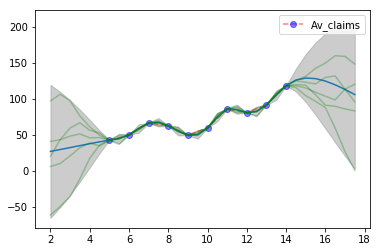

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF,RationalQuadratic, ExpSineSquared, ConstantKernel, Matern



kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                      nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel).fit(year, claims)
# gpr.score(year, claims)

n_vars = 32
all_year = np.arange(2, 18, 0.5).reshape(-1, 1)

yp, std = gpr.predict(all_year, return_std=True) 

yp_array = gpr.sample_y(all_year, n_samples=5)

# print(yp_array[:,0,:].shape)

fill_year = all_year.reshape(n_vars)
fill_yp = yp.reshape(n_vars)
fill_std = std.reshape(n_vars)

showBasicPlot(True)
plt.plot(all_year, yp)
plt.fill_between(fill_year, np.subtract(fill_yp, np.multiply(2, fill_std)), 
                 np.add(fill_yp, np.multiply(2, fill_std)), alpha=0.4,
                 color="grey")
color = "g"
# for sampled_yp, color in zip(yp_array.T, colors):
plt.plot(all_year, yp_array[:,0,:], color=color, alpha=0.3)
plt.show()

In [0]:
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X, y)
gpr.score(X, y) 

gpr.predict(X[:2,:], return_std=True) 

(array([653.08792288, 592.16905327]), array([316.68016218, 316.65121679]))

In [0]:
print(np.subtract(yp, np.multiply(2, std.reshape(10, 1))))

[[24.45240246]
 [27.62470018]
 [30.9737973 ]
 [34.79610093]
 [39.59683047]
 [45.91848458]
 [54.1443366 ]
 [64.2829411 ]
 [75.69896124]
 [87.05257538]]


In [0]:
print(std.reshape(10, 1).shape)

(10, 1)
